# Part 3: ALICES baseline analysis

## Preparations

In [1]:
%matplotlib inline

import logging
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import sys
from scipy.stats import norm

logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

sys.path.append("/Users/johannbrehmer/work/projects/madminer/madminer")
from madminer.sampling import SampleAugmenter
from madminer import sampling
from madminer.ml import ParameterizedRatioEstimator

sys.path.append("/Users/johannbrehmer/work/projects/manifold_flow/manifold-flow")
from experiments.evaluation import mcmc

for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)
        


09:37 madminer             INFO    
09:37 madminer             INFO    ------------------------------------------------------------------------
09:37 madminer             INFO    |                                                                      |
09:37 madminer             INFO    |  MadMiner v0.7.1                                                     |
09:37 madminer             INFO    |                                                                      |
09:37 madminer             INFO    |         Johann Brehmer, Felix Kling, Irina Espejo, and Kyle Cranmer  |
09:37 madminer             INFO    |                                                                      |
09:37 madminer             INFO    ------------------------------------------------------------------------
09:37 madminer             INFO    
09:37 experiments.training WARNING geomloss not found, let's hope that you started a training method that doesn't need it!


## Generate training data

In [ ]:
sampler = SampleAugmenter('data/delphes_data.h5')

In [3]:
x, theta0, theta1, y, r_xz, t_xz, n_effective = sampler.sample_train_ratio(
    theta0=sampling.random_morphing_points(1000, [('gaussian', 0., 1.0), ('gaussian', 0., 1.0)]),
    theta1=sampling.morphing_point([0.,0.]),
    n_samples=1000000,
    folder='./data/samples',
    filename='train_ratio',
    sample_only_from_closest_benchmark=True,
    return_individual_n_effective=True,
)

18:30 madminer.sampling    INFO    Extracting training sample for ratio-based methods. Numerator hypothesis: 1000 random morphing points, drawn from the following priors:
  theta_0 ~ Gaussian with mean 0.0 and std 1.0
  theta_1 ~ Gaussian with mean 0.0 and std 1.0, denominator hypothesis: [0. 0.]
18:30 madminer.sampling    INFO    Starting sampling serially
18:30 madminer.sampling    INFO    Sampling from parameter point 50 / 1000
18:30 madminer.sampling    WARNING Large statistical uncertainty on the total cross section when sampling from theta = [ 0.39923188 -0.23322676]: (0.003817 +/- 0.000416) pb (10.895047869081584 %). Skipping these warnings in the future...
18:31 madminer.sampling    INFO    Sampling from parameter point 100 / 1000
18:31 madminer.sampling    INFO    Sampling from parameter point 150 / 1000
18:31 madminer.sampling    INFO    Sampling from parameter point 200 / 1000
18:31 madminer.sampling    INFO    Sampling from parameter point 250 / 1000
18:32 madminer.sampling

## Train likelihood ratio estimators with ALICES method

In [4]:
for i in range(2,5):
    logging.info("Let's go run %s!", i + 1)
    
    estimator = ParameterizedRatioEstimator(
        n_hidden=(100, 100, 100,),
        activation="tanh"
    )
    estimator.train(
        method='alices',
        theta='data/samples/theta0_train_ratio.npy',
        x='data/samples/x_train_ratio.npy',
        y='data/samples/y_train_ratio.npy',
        r_xz='data/samples/r_xz_train_ratio.npy',
        t_xz='data/samples/t_xz_train_ratio.npy',
        alpha=1.,
        n_epochs=50,
    )
    estimator.save('models/alices{}'.format("" if i == 0 else "_run{}".format(i)))
    

14:32 root                 INFO    Let's go run 3!
14:32 madminer.ml          INFO    Starting training
14:32 madminer.ml          INFO      Method:                 alices
14:32 madminer.ml          INFO      alpha:                  1.0
14:32 madminer.ml          INFO      Batch size:             128
14:32 madminer.ml          INFO      Optimizer:              amsgrad
14:32 madminer.ml          INFO      Epochs:                 50
14:32 madminer.ml          INFO      Learning rate:          0.001 initially, decaying to 0.0001
14:32 madminer.ml          INFO      Validation split:       0.25
14:32 madminer.ml          INFO      Early stopping:         True
14:32 madminer.ml          INFO      Scale inputs:           True
14:32 madminer.ml          INFO      Scale parameters:       True
14:32 madminer.ml          INFO      Shuffle labels          False
14:32 madminer.ml          INFO      Samples:                all
14:32 madminer.ml          INFO    Loading training data
14:32 madminer.

15:08 madminer.utils.ml.tr INFO                        fwd: move data:   0.01h
15:08 madminer.utils.ml.tr INFO                   fwd: check for nans:   0.03h
15:08 madminer.utils.ml.tr INFO                    fwd: model.forward:   0.20h
15:08 madminer.utils.ml.tr INFO                 fwd: calculate losses:   0.02h
15:08 madminer.utils.ml.tr INFO                 training forward pass:   0.19h
15:08 madminer.utils.ml.tr INFO                   training sum losses:   0.01h
15:08 madminer.utils.ml.tr INFO                        opt: zero grad:   0.00h
15:08 madminer.utils.ml.tr INFO                         opt: backward:   0.19h
15:08 madminer.utils.ml.tr INFO                   opt: clip grad norm:   0.00h
15:08 madminer.utils.ml.tr INFO                             opt: step:   0.03h
15:08 madminer.utils.ml.tr INFO                        optimizer step:   0.22h
15:08 madminer.utils.ml.tr INFO                 load validation batch:   0.03h
15:08 madminer.utils.ml.tr INFO               valida

15:47 madminer.utils.ml.tr INFO      Epoch  48: train loss  0.76228 (improved_xe:  0.385, mse_score:  0.377)
15:47 madminer.utils.ml.tr INFO                 val. loss   1.00877 (improved_xe:  0.385, mse_score:  0.623)
15:49 madminer.utils.ml.tr INFO      Epoch  50: train loss  0.75958 (improved_xe:  0.385, mse_score:  0.375)
15:49 madminer.utils.ml.tr INFO                 val. loss   1.00771 (improved_xe:  0.385, mse_score:  0.622)
15:49 madminer.utils.ml.tr INFO    Early stopping did not improve performance
15:49 madminer.utils.ml.tr INFO    Training time spend on:
15:49 madminer.utils.ml.tr INFO                      initialize model:   0.00h
15:49 madminer.utils.ml.tr INFO                                   ALL:   0.68h
15:49 madminer.utils.ml.tr INFO                            check data:   0.00h
15:49 madminer.utils.ml.tr INFO                          make dataset:   0.00h
15:49 madminer.utils.ml.tr INFO                       make dataloader:   0.00h
15:49 madminer.utils.ml.tr INFO 

16:14 madminer.utils.ml.tr INFO      Epoch  36: train loss  0.80245 (improved_xe:  0.386, mse_score:  0.416)
16:14 madminer.utils.ml.tr INFO                 val. loss   0.99200 (improved_xe:  0.386, mse_score:  0.606)
16:16 madminer.utils.ml.tr INFO      Epoch  38: train loss  0.79805 (improved_xe:  0.386, mse_score:  0.412)
16:16 madminer.utils.ml.tr INFO                 val. loss   0.99079 (improved_xe:  0.386, mse_score:  0.605)
16:17 madminer.utils.ml.tr INFO      Epoch  40: train loss  0.79365 (improved_xe:  0.386, mse_score:  0.408)
16:17 madminer.utils.ml.tr INFO                 val. loss   0.99023 (improved_xe:  0.386, mse_score:  0.604)
16:19 madminer.utils.ml.tr INFO      Epoch  42: train loss  0.78983 (improved_xe:  0.386, mse_score:  0.404)
16:19 madminer.utils.ml.tr INFO                 val. loss   0.98832 (improved_xe:  0.386, mse_score:  0.602)
16:20 madminer.utils.ml.tr INFO      Epoch  44: train loss  0.78643 (improved_xe:  0.386, mse_score:  0.401)
16:20 madminer.util

## Evaluate likelihood ratio on grid

In [12]:
theta_each = np.linspace(-1,1,11)
theta0, theta1 = np.meshgrid(theta_each, theta_each)
theta_grid = np.vstack((theta0.flatten(), theta1.flatten())).T
np.save('data/samples/theta_grid.npy', theta_grid)


In [13]:
estimator.load('models/alices')

log_r_hat, _ = estimator.evaluate_log_likelihood_ratio(
    theta='data/samples/theta_grid.npy',
    x='data/samples/x_test.npy',
    evaluate_score=False
)

20:02 madminer.ml          INFO    Loading model from models/alices
20:02 madminer.ml          INFO    Loading evaluation data
20:02 madminer.utils.vario INFO      Loading data/samples/x_test.npy into RAM
20:02 madminer.utils.vario INFO      Loading data/samples/theta_grid.npy into RAM
20:02 madminer.ml          INFO    Starting ratio evaluation for 1210000 x-theta combinations
20:02 madminer.ml          INFO    Evaluation done


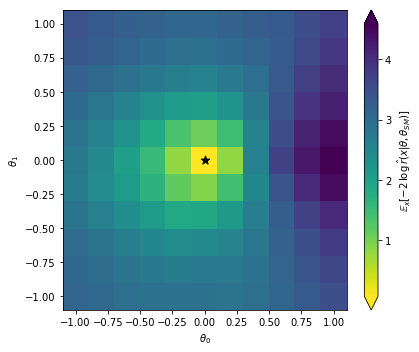

In [15]:
bin_size = theta_each[1] - theta_each[0]
edges = np.linspace(theta_each[0] - bin_size/2, theta_each[-1] + bin_size/2, len(theta_each)+1)

fig = plt.figure(figsize=(6,5))
ax = plt.gca()

expected_llr = np.mean(log_r_hat,axis=1)
best_fit = theta_grid[np.argmin(-2.*expected_llr)]

cmin, cmax = np.min(-2*expected_llr), np.max(-2*expected_llr)
    
pcm = ax.pcolormesh(edges, edges, -2. * expected_llr.reshape((11,11)),
                    norm=matplotlib.colors.Normalize(vmin=cmin, vmax=cmax),
                    cmap='viridis_r')
cbar = fig.colorbar(pcm, ax=ax, extend='both')

plt.scatter(best_fit[0], best_fit[1], s=80., color='black', marker='*')

plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
cbar.set_label(r'$\mathbb{E}_x [ -2\, \log \,\hat{r}(x | \theta, \theta_{SM}) ]$')

plt.tight_layout()
plt.show()


## Run MCMC

In [2]:
for key in logging.Logger.manager.loggerDict:
    if "madminer" in key:
        logging.getLogger(key).setLevel(logging.WARNING)
    if "mcmc" in key:
        logging.getLogger(key).setLevel(logging.INFO)

In [5]:
def run_mcmc(run=0, trueparam=0, chain=0, observedsamples=50, mcmcsamples=750, mcmcstep=0.15, burnin=100, thin=1):
    run_str = "" if run == 0 else "_run{}".format(run)
    trueparam_str = "" if trueparam == 0 else "_trueparam{}".format(trueparam)
    chain_str = "" if chain == 0 else "_chain{}".format(chain)
    
    # Model
    estimator = ParameterizedRatioEstimator(
        n_hidden=(100, 100, 100),
        activation="tanh"
    )
    estimator.load('models/alices{}'.format(run_str))

    # Data
    theta_true = np.load("data/samples/theta_test{}.npy".format("" if trueparam == 0 else trueparam))[0]
    x_obs = np.load("data/samples/x_test{}.npy".format("" if trueparam == 0 else trueparam))[:observedsamples]

    # MCMC based on neural likelihood estimator
    def log_posterior(params):
        params_ = np.broadcast_to(params.reshape((-1, params.shape[-1])), (x_obs.shape[0], params.shape[-1]))

        # Likelihood ratio
        log_likelihood_ratios = estimator.evaluate_log_likelihood_ratio(
            theta=params_,
            x=x_obs,
            evaluate_score=False,
            test_all_combinations=False
        )[0]
        log_prob = np.sum(log_likelihood_ratios)

        # Prior
        log_prob += np.sum(norm(loc=0.0, scale=1.0).logpdf(x=params))
        return float(log_prob)

    sampler = mcmc.GaussianMetropolis(theta_true, log_posterior, step=mcmcstep, thin=thin)

    if burnin > 0:
        logging.info("Starting burn in")
        sampler.gen(burnin)
    logging.info("Burn in done, starting main chain")
    posterior_samples = sampler.gen(mcmcsamples)
    logging.info("MCMC done")
    
    np.save(
        "data/results/alices_14_lhc_may{}_posterior_samples{}{}.npy".format(run_str, trueparam_str, chain_str),
        posterior_samples
    )

    return posterior_samples

In [6]:
posterior_samples = []

for run in range(5):
    for trueparam in range(3):
        for chain in range(4):
            run_mcmc(run, trueparam, chain)


09:41 root                 INFO    Starting burn in
09:41 experiments.evaluati INFO    MCMC after sample 100 = [ 0.08502071 -0.00509992]: acceptance rate = 0.02, log likelihood = -3.46
09:41 experiments.evaluati INFO    MCMC chain finished after 100 samples: acceptance rate = 0.02, log likelihood = -3.46
09:41 root                 INFO    Burn in done, starting main chain
09:41 experiments.evaluati INFO    MCMC after sample 100 = [0.04521495 0.02722951]: acceptance rate = 0.05, log likelihood = -0.80
09:41 experiments.evaluati INFO    MCMC after sample 200 = [0.03336437 0.00783463]: acceptance rate = 0.04, log likelihood = -1.21
09:41 experiments.evaluati INFO    MCMC after sample 300 = [0.04743766 0.02452015]: acceptance rate = 0.04, log likelihood = -0.77
09:41 experiments.evaluati INFO    MCMC after sample 400 = [0.04743766 0.02452015]: acceptance rate = 0.03, log likelihood = -0.77
09:41 experiments.evaluati INFO    MCMC after sample 500 = [0.04743766 0.02452015]: acceptance rate =

09:41 experiments.evaluati INFO    MCMC after sample 600 = [0.35857618 0.09397897]: acceptance rate = 0.16, log likelihood = 89.42
09:41 experiments.evaluati INFO    MCMC after sample 700 = [0.36805345 0.04109399]: acceptance rate = 0.17, log likelihood = 89.62
09:41 experiments.evaluati INFO    MCMC chain finished after 750 samples: acceptance rate = 0.17, log likelihood = 89.85
09:41 root                 INFO    MCMC done
09:41 root                 INFO    Starting burn in
09:41 experiments.evaluati INFO    MCMC after sample 100 = [0.37977754 0.01046687]: acceptance rate = 0.26, log likelihood = 88.66
09:41 experiments.evaluati INFO    MCMC chain finished after 100 samples: acceptance rate = 0.26, log likelihood = 88.66
09:41 root                 INFO    Burn in done, starting main chain
09:41 experiments.evaluati INFO    MCMC after sample 100 = [0.38620211 0.00407415]: acceptance rate = 0.19, log likelihood = 88.38
09:41 experiments.evaluati INFO    MCMC after sample 200 = [0.342015

09:42 experiments.evaluati INFO    MCMC after sample 200 = [-2.12302512 -0.99632438]: acceptance rate = 0.74, log likelihood = 85.30
09:42 experiments.evaluati INFO    MCMC after sample 300 = [-1.79352317 -1.32013855]: acceptance rate = 0.72, log likelihood = 89.29
09:42 experiments.evaluati INFO    MCMC after sample 400 = [-1.32022128 -1.51237729]: acceptance rate = 0.74, log likelihood = 90.33
09:42 experiments.evaluati INFO    MCMC after sample 500 = [-1.49085248 -1.86034619]: acceptance rate = 0.75, log likelihood = 89.61
09:42 experiments.evaluati INFO    MCMC after sample 600 = [-1.06930997 -1.19999696]: acceptance rate = 0.76, log likelihood = 90.75
09:42 experiments.evaluati INFO    MCMC after sample 700 = [-1.87472105 -2.06554651]: acceptance rate = 0.77, log likelihood = 89.11
09:42 experiments.evaluati INFO    MCMC chain finished after 750 samples: acceptance rate = 0.77, log likelihood = 89.87
09:42 root                 INFO    MCMC done
09:42 root                 INFO    S

09:42 root                 INFO    MCMC done
09:42 root                 INFO    Starting burn in
09:42 experiments.evaluati INFO    MCMC after sample 100 = [0.40464518 0.15190336]: acceptance rate = 0.22, log likelihood = 90.87
09:42 experiments.evaluati INFO    MCMC chain finished after 100 samples: acceptance rate = 0.22, log likelihood = 90.87
09:42 root                 INFO    Burn in done, starting main chain
09:42 experiments.evaluati INFO    MCMC after sample 100 = [0.45673479 0.20847024]: acceptance rate = 0.25, log likelihood = 89.69
09:42 experiments.evaluati INFO    MCMC after sample 200 = [0.48390102 0.09556649]: acceptance rate = 0.21, log likelihood = 90.47
09:42 experiments.evaluati INFO    MCMC after sample 300 = [0.45282232 0.12407324]: acceptance rate = 0.20, log likelihood = 91.04
09:42 experiments.evaluati INFO    MCMC after sample 400 = [0.46163267 0.05006061]: acceptance rate = 0.18, log likelihood = 89.82
09:42 experiments.evaluati INFO    MCMC after sample 500 =

09:42 experiments.evaluati INFO    MCMC after sample 500 = [-2.43967329 -2.06064103]: acceptance rate = 0.73, log likelihood = 84.62
09:42 experiments.evaluati INFO    MCMC after sample 600 = [-2.17682457 -1.55178445]: acceptance rate = 0.74, log likelihood = 84.56
09:42 experiments.evaluati INFO    MCMC after sample 700 = [-1.2954276  -1.05569096]: acceptance rate = 0.75, log likelihood = 85.57
09:42 experiments.evaluati INFO    MCMC chain finished after 750 samples: acceptance rate = 0.75, log likelihood = 83.93
09:42 root                 INFO    MCMC done
09:42 root                 INFO    Starting burn in
09:42 experiments.evaluati INFO    MCMC after sample 100 = [-1.79659591 -1.53867012]: acceptance rate = 0.78, log likelihood = 85.47
09:42 experiments.evaluati INFO    MCMC chain finished after 100 samples: acceptance rate = 0.78, log likelihood = 85.47
09:42 root                 INFO    Burn in done, starting main chain
09:42 experiments.evaluati INFO    MCMC after sample 100 = [

09:42 experiments.evaluati INFO    MCMC after sample 100 = [0.47733085 0.19753084]: acceptance rate = 0.15, log likelihood = 91.78
09:42 experiments.evaluati INFO    MCMC after sample 200 = [0.43538035 0.11338897]: acceptance rate = 0.15, log likelihood = 92.53
09:42 experiments.evaluati INFO    MCMC after sample 300 = [0.54295192 0.2119654 ]: acceptance rate = 0.17, log likelihood = 90.96
09:42 experiments.evaluati INFO    MCMC after sample 400 = [0.41479457 0.1543499 ]: acceptance rate = 0.17, log likelihood = 92.57
09:42 experiments.evaluati INFO    MCMC after sample 500 = [0.51838563 0.19190594]: acceptance rate = 0.17, log likelihood = 91.58
09:42 experiments.evaluati INFO    MCMC after sample 600 = [0.39350175 0.22007929]: acceptance rate = 0.17, log likelihood = 90.19
09:42 experiments.evaluati INFO    MCMC after sample 700 = [0.51399318 0.22239778]: acceptance rate = 0.16, log likelihood = 91.00
09:42 experiments.evaluati INFO    MCMC chain finished after 750 samples: acceptanc

09:42 experiments.evaluati INFO    MCMC chain finished after 750 samples: acceptance rate = 0.65, log likelihood = 89.78
09:42 root                 INFO    MCMC done
09:42 root                 INFO    Starting burn in
09:42 experiments.evaluati INFO    MCMC after sample 100 = [-0.9888748  -0.89138114]: acceptance rate = 0.66, log likelihood = 91.38
09:42 experiments.evaluati INFO    MCMC chain finished after 100 samples: acceptance rate = 0.66, log likelihood = 91.38
09:42 root                 INFO    Burn in done, starting main chain
09:42 experiments.evaluati INFO    MCMC after sample 100 = [-0.84275096 -0.61863492]: acceptance rate = 0.65, log likelihood = 89.97
09:42 experiments.evaluati INFO    MCMC after sample 200 = [-0.7644136  -0.77430276]: acceptance rate = 0.59, log likelihood = 91.70
09:42 experiments.evaluati INFO    MCMC after sample 300 = [-0.94749462 -0.92587243]: acceptance rate = 0.59, log likelihood = 91.59
09:42 experiments.evaluati INFO    MCMC after sample 400 = [

09:43 experiments.evaluati INFO    MCMC after sample 400 = [0.07440889 0.04300222]: acceptance rate = 0.04, log likelihood = -5.07
09:43 experiments.evaluati INFO    MCMC after sample 500 = [0.00268885 0.02670865]: acceptance rate = 0.04, log likelihood = -4.03
09:43 experiments.evaluati INFO    MCMC after sample 600 = [0.06011889 0.01021977]: acceptance rate = 0.04, log likelihood = -3.44
09:43 experiments.evaluati INFO    MCMC after sample 700 = [0.00093733 0.02677479]: acceptance rate = 0.04, log likelihood = -4.13
09:43 experiments.evaluati INFO    MCMC chain finished after 750 samples: acceptance rate = 0.04, log likelihood = -3.25
09:43 root                 INFO    MCMC done
09:43 root                 INFO    Starting burn in
09:43 experiments.evaluati INFO    MCMC after sample 100 = [0.46254845 0.12261788]: acceptance rate = 0.14, log likelihood = 93.20
09:43 experiments.evaluati INFO    MCMC chain finished after 100 samples: acceptance rate = 0.14, log likelihood = 93.20
09:43 

09:43 root                 INFO    Burn in done, starting main chain
09:43 experiments.evaluati INFO    MCMC after sample 100 = [-0.83951149 -0.89462652]: acceptance rate = 0.60, log likelihood = 92.92
09:43 experiments.evaluati INFO    MCMC after sample 200 = [-0.52677587 -0.55255394]: acceptance rate = 0.68, log likelihood = 92.72
09:43 experiments.evaluati INFO    MCMC after sample 300 = [-0.98339813 -0.83500968]: acceptance rate = 0.69, log likelihood = 92.73
09:43 experiments.evaluati INFO    MCMC after sample 400 = [-1.05690146 -1.1855909 ]: acceptance rate = 0.69, log likelihood = 92.20
09:43 experiments.evaluati INFO    MCMC after sample 500 = [-0.52076277 -0.49204097]: acceptance rate = 0.69, log likelihood = 92.31
09:43 experiments.evaluati INFO    MCMC after sample 600 = [-0.90274494 -0.79184498]: acceptance rate = 0.66, log likelihood = 92.86
09:43 experiments.evaluati INFO    MCMC after sample 700 = [-0.60228546 -0.84559921]: acceptance rate = 0.66, log likelihood = 92.21


09:43 experiments.evaluati INFO    MCMC after sample 700 = [ 0.0340447  -0.00350513]: acceptance rate = 0.03, log likelihood = -0.56
09:43 experiments.evaluati INFO    MCMC chain finished after 750 samples: acceptance rate = 0.03, log likelihood = -0.21
09:43 root                 INFO    MCMC done
09:43 root                 INFO    Starting burn in
09:43 experiments.evaluati INFO    MCMC after sample 100 = [ 0.05266719 -0.00166118]: acceptance rate = 0.04, log likelihood = -0.96
09:43 experiments.evaluati INFO    MCMC chain finished after 100 samples: acceptance rate = 0.04, log likelihood = -0.96
09:43 root                 INFO    Burn in done, starting main chain
09:43 experiments.evaluati INFO    MCMC after sample 100 = [ 0.03752087 -0.0033556 ]: acceptance rate = 0.04, log likelihood = -0.59
09:43 experiments.evaluati INFO    MCMC after sample 200 = [ 0.03082367 -0.01595508]: acceptance rate = 0.06, log likelihood = -1.35
09:43 experiments.evaluati INFO    MCMC after sample 300 = [

09:43 experiments.evaluati INFO    MCMC after sample 300 = [-1.51272734 -1.51408731]: acceptance rate = 0.69, log likelihood = 91.84
09:43 experiments.evaluati INFO    MCMC after sample 400 = [-0.50944387 -0.53234079]: acceptance rate = 0.71, log likelihood = 92.15
09:43 experiments.evaluati INFO    MCMC after sample 500 = [-1.69158351 -1.58804734]: acceptance rate = 0.69, log likelihood = 91.56
09:43 experiments.evaluati INFO    MCMC after sample 600 = [-1.46658298 -1.63457052]: acceptance rate = 0.69, log likelihood = 91.30
09:43 experiments.evaluati INFO    MCMC after sample 700 = [-1.8587114  -1.72652339]: acceptance rate = 0.70, log likelihood = 91.01
09:43 experiments.evaluati INFO    MCMC chain finished after 750 samples: acceptance rate = 0.71, log likelihood = 92.66
09:43 root                 INFO    MCMC done
09:43 root                 INFO    Starting burn in
09:43 experiments.evaluati INFO    MCMC after sample 100 = [-1.57992479 -1.4281614 ]: acceptance rate = 0.72, log lik